<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.  

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks.  

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.  

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features.  

Please take responsibility for managing and installing all the required libraries for this lab on your own.

#### Exercise 1:  

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.  


ステップ 1: データの読み込みと前処理
タスク 1: League of Legendsのデータセットを読み込み、トレーニングのために前処理を行う。 データセットの読み込みと前処理には、データの読み込み、トレーニングセットとテストセットへの分割、および特徴量の標準化が含まれます。データ操作にはpandasを、データ分割にはsklearnのtrain_test_splitを、特徴量のスケーリングにはStandardScalerを使用します。

データセットの読み込みと前処理には、データの読み込み、トレーニングセットとテストセットへの分割、および特徴量の標準化が含まれます。

このラボで必要なライブラリの管理とインストールについては、各自で責任を持って行ってください。

演習 1
データセットを読み込み、トレーニングセットとテストセットに分割し、特徴量を標準化し、データをPyTorchテンソルに変換してPyTorchモデルのトレーニングで使用できるようにするコードを書いてください。

In [5]:
# 必要なライブラリをインストール
!pip install pandas numpy matplotlib seaborn scikit-learn torch



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached torch-2.5.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.10.0-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.2-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached torch-2.5.1-cp312-cp312-win_amd64.whl (203.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached fileloc

ERROR: Could not install packages due to an OSError: [WinError 2] 指定されたファイルが見つかりません。: 'C:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe' -> 'C:\\Python312\\Scripts\\convert-caffe2-to-onnx.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# データセットを読み込む
data = pd.read_csv('league_of_legends_data_large.csv')

# データの前処理を行う
X = data.drop('win', axis=1)  # ターゲット列 'win' を除外して特徴量にする
y = data['win']  # ターゲット列 'win' を設定

# データセットをトレーニングセットとテストセットに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# データを標準化する
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # トレーニングデータに基づいて標準化
X_test = scaler.transform(X_test)  # テストデータも同じスケーリングを適用

# テンソルに変換する
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # ターゲットを1列に整形
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)  # ターゲットを1列に整形

print("データの読み込み、分割、標準化が完了しました。")


データの読み込み、分割、標準化が完了しました。


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


ステップ 2: ロジスティック回帰モデル
タスク 2: PyTorchを使用してロジスティック回帰モデルを実装する。
ロジスティック回帰モデルの定義には、入力の次元を指定し、シグモイド活性化関数を使ったフォワードパスを定義し、モデル、損失関数、およびオプティマイザの初期化が含まれます。

演習 2:
PyTorchを使用してロジスティック回帰モデルを定義し、入力の次元とフォワードパスを指定してください。また、モデル、損失関数、およびオプティマイザを初期化してください。

In [7]:
import torch.nn as nn
import torch.optim as optim

# ロジスティック回帰モデルを定義する
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        # 線形層を定義（入力次元から1つの出力に変換）
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        # 線形変換の結果にシグモイド関数を適用して予測値を出力
        return torch.sigmoid(self.linear(x))

# モデル、損失関数、およびオプティマイザを初期化
input_dim = X_train.shape[1]  # 入力次元（特徴量の数）を設定
model = LogisticRegressionModel(input_dim)  # モデルを初期化
criterion = nn.BCELoss()  # バイナリクロスエントロピー損失を使用
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 確率的勾配降下法（SGD）オプティマイザを設定

print("モデル、損失関数、およびオプティマイザの初期化が完了しました。")


モデル、損失関数、およびオプティマイザの初期化が完了しました。


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters .  

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


ステップ 3: モデルのトレーニング
タスク 3: データセットを使ってロジスティック回帰モデルをトレーニングする。
トレーニングループは指定されたエポック数だけ実行します。各エポックで、モデルが予測を行い、損失を計算し、逆伝播を実行してモデルのパラメータを更新します。

演習 3:
データセットを使ってロジスティック回帰モデルをトレーニングするコードを書いてください。トレーニングループを実装し、予測、損失の計算、逆伝播、モデルパラメータの更新を行います。また、トレーニングセットとテストセットにおけるモデルの精度を評価してください。

In [8]:
# モデルのトレーニング
epochs = 1000  # エポック数（学習の繰り返し回数）
for epoch in range(epochs):
    model.train()  # モデルをトレーニングモードに設定
    optimizer.zero_grad()  # 勾配をリセット
    outputs = model(X_train)  # トレーニングデータを使用して予測値を計算
    loss = criterion(outputs, y_train)  # 損失を計算（予測値と実際のラベルの誤差）
    loss.backward()  # 逆伝播を実行して勾配を計算
    optimizer.step()  # 勾配降下法に基づいてパラメータを更新
    
    # 100エポックごとに損失を表示
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# モデルの評価
model.eval()  # モデルを評価モードに設定
with torch.no_grad():  # 勾配計算を無効にしてメモリ節約
    y_pred_train = model(X_train).detach()  # トレーニングデータでの予測を計算
    y_pred_test = model(X_test).detach()  # テストデータでの予測を計算

# トレーニングとテストデータでの精度を計算
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()  # トレーニングデータの精度
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()  # テストデータの精度

# 精度を表示
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch [100/1000], Loss: 0.7290
Epoch [200/1000], Loss: 0.7115
Epoch [300/1000], Loss: 0.7009
Epoch [400/1000], Loss: 0.6945
Epoch [500/1000], Loss: 0.6907
Epoch [600/1000], Loss: 0.6885
Epoch [700/1000], Loss: 0.6872
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6857
Train Accuracy: 0.5638
Test Accuracy: 0.5150


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets.  

#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


ステップ 4: モデルの最適化と評価
タスク 4: 最適化手法を実装し、モデルのパフォーマンスを評価する。
L2正則化（リッジ回帰）などの最適化手法は、過学習を防ぐのに役立ちます。これらの最適化を使ってモデルを再トレーニングし、トレーニングセットとテストセットの両方でそのパフォーマンスを評価します。

演習 4:
L2正則化などの最適化手法を実装し、モデルを再トレーニングしてください。最適化されたモデルのパフォーマンスを、トレーニングセットとテストセットの両方で評価してください。

In [9]:
# L2正則化（リッジ回帰）を実装する
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)  # weight_decay パラメータを使用してL2正則化を追加

# L2正則化を使用してモデルを再トレーニング
epochs = 1000  # エポック数を設定
for epoch in range(epochs):
    model.train()  # モデルをトレーニングモードに設定
    optimizer.zero_grad()  # 勾配をリセット
    outputs = model(X_train)  # トレーニングデータを使用して予測値を計算
    loss = criterion(outputs, y_train)  # 損失を計算（予測値と実際のラベルの誤差）
    loss.backward()  # 逆伝播を実行して勾配を計算
    optimizer.step()  # 勾配降下法に基づいてパラメータを更新
    
    # 100エポックごとに損失を表示
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 最適化されたモデルの評価
model.eval()  # モデルを評価モードに設定
with torch.no_grad():  # 勾配計算を無効にしてメモリ節約
    y_pred_train = model(X_train).detach()  # トレーニングデータでの予測を計算
    y_pred_test = model(X_test).detach()  # テストデータでの予測を計算

# トレーニングとテストデータでの精度を計算
train_accuracy = ((y_pred_train > 0.5) == y_train).float().mean()  # トレーニングデータの精度
test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()  # テストデータの精度

# 精度を表示
print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [100/1000], Loss: 0.6855
Epoch [200/1000], Loss: 0.6854
Epoch [300/1000], Loss: 0.6854
Epoch [400/1000], Loss: 0.6853
Epoch [500/1000], Loss: 0.6853
Epoch [600/1000], Loss: 0.6853
Epoch [700/1000], Loss: 0.6853
Epoch [800/1000], Loss: 0.6853
Epoch [900/1000], Loss: 0.6853
Epoch [1000/1000], Loss: 0.6853
Train Accuracy: 0.5437
Test Accuracy: 0.5050


### Step 5: Visualization and Interpretation  

#### Task 5: Visualize the model's performance and interpret the results.  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.  

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.  


ステップ 5: 可視化と解釈
タスク 5: モデルのパフォーマンスを可視化し、結果を解釈する。
混同行列やROC曲線といった可視化ツールは、モデルのパフォーマンスを理解するのに役立ちます。混同行列は分類の精度を理解するために、ROC曲線は感度と特異度のトレードオフを示すために使用されます。

演習 5:
混同行列とROC曲線を使用してモデルのパフォーマンスを可視化するコードを書いてください。さらに、分類レポートを生成し、精度（precision）、再現率（recall）、F1スコアを評価してください。L2正則化を用いてモデルを再トレーニングし、パフォーマンスを評価してください。

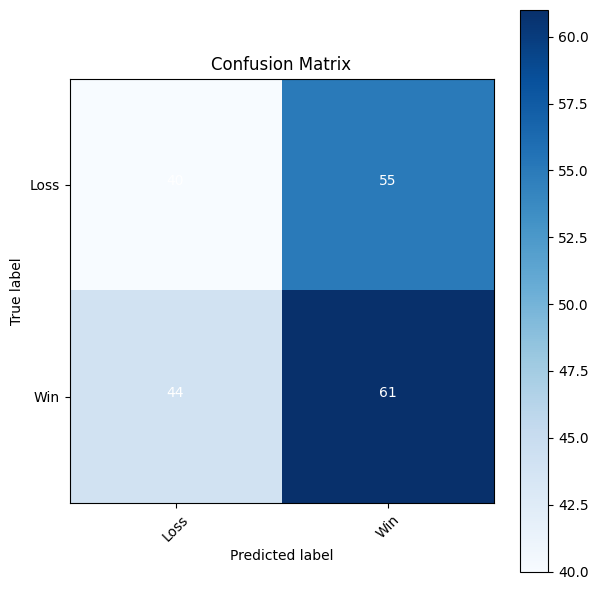

Classification Report:
               precision    recall  f1-score   support

        Loss       0.48      0.42      0.45        95
         Win       0.53      0.58      0.55       105

    accuracy                           0.51       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.51      0.50       200



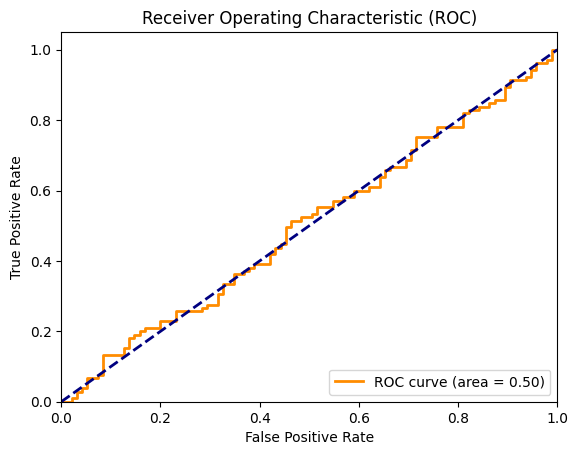

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# 混同行列を可視化
y_pred_test_labels = (y_pred_test > 0.5).float()  # テストデータの予測値を0.5で四捨五入してクラスラベルに変換
cm = confusion_matrix(y_test, y_pred_test_labels)  # 混同行列を計算

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # 混同行列を青のカラーマップで描画
plt.title('Confusion Matrix')  # タイトルを設定
plt.colorbar()  # カラーバーを表示
tick_marks = range(2)  # クラスの数に基づいて目盛りを設定
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)  # x軸にクラスラベルを設定
plt.yticks(tick_marks, ['Loss', 'Win'])  # y軸にクラスラベルを設定

# 混同行列の各セルに数値を表示（閾値に応じて色を変更）
thresh = cm.max() / 2  # 色を決める閾値を設定
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')  # y軸のラベル
plt.xlabel('Predicted label')  # x軸のラベル
plt.show()

# 分類レポートを表示
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# ROC曲線をプロット
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)  # 偽陽性率、真陽性率、閾値を計算
roc_auc = auc(fpr, tpr)  # AUC（ROC曲線下面積）を計算

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')  # ROC曲線をプロット
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 対角線（ランダム分類）をプロット
plt.xlim([0.0, 1.0])  # x軸の範囲を設定
plt.ylim([0.0, 1.05])  # y軸の範囲を設定
plt.xlabel('False Positive Rate')  # x軸のラベル
plt.ylabel('True Positive Rate')  # y軸のラベル
plt.title('Receiver Operating Characteristic (ROC)')  # タイトルを設定
plt.legend(loc="lower right")  # 凡例を右下に表示
plt.show()


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


演習6: モデルの保存と読み込み
このタスクでは、トレーニング済みのモデルをtorch.saveを使って保存し、torch.loadを用いて再読み込みする方法を説明します。読み込んだモデルが元のパフォーマンスを保持しているかを評価し、実際のアプリケーションにおけるデプロイの際にも利用できるようにします。

Exercise 6:
トレーニング済みのモデルを保存し、再読み込みするコードを書いてください。また、読み込んだモデルがテストデータセットで一貫したパフォーマンスを発揮することを確認してください。

In [11]:
# モデルを保存
torch.save(model.state_dict(), 'logistic_regression_model.pth')  # モデルの状態（パラメータ）をファイルに保存

# モデルを読み込む
loaded_model = LogisticRegressionModel(input_dim)  # 新しいモデルインスタンスを作成
loaded_model.load_state_dict(torch.load('logistic_regression_model.pth'))  # 保存した状態を読み込む

# 読み込んだモデルを評価モードに設定
loaded_model.eval()  # 評価モードにすることで、ドロップアウトやバッチ正規化の影響を防ぐ

# 読み込んだモデルを評価
with torch.no_grad():  # 評価時は勾配計算を停止してメモリを節約
    y_pred_test_loaded = loaded_model(X_test).detach()  # テストデータで予測を行い、勾配追跡を解除
    loaded_test_accuracy = ((y_pred_test_loaded > 0.5) == y_test).float().mean()  # 予測結果を0.5で四捨五入して精度を計算
    print(f'Loaded Model Test Accuracy: {loaded_test_accuracy:.4f}')  # 読み込んだモデルのテスト精度を表示


Loaded Model Test Accuracy: 0.5050


C:\Users\大澤峻\AppData\Local\Temp\ipykernel_23964\2141370921.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load('logistic_regression_m

### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance .  

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


演習7: ハイパーパラメータチューニング
このタスクでは、異なる学習率（learning rate）をテストすることで、テスト精度が最も高くなる最適な学習率を見つけます。学習率の微調整は、モデルのパフォーマンスを向上させるために非常に重要です。

Exercise 7:
異なる学習率でモデルを再訓練し、それぞれの性能を評価して最適な学習率を特定してください。

In [12]:
# 学習率のリストを定義
learning_rates = [0.01, 0.05, 0.1]  # 調整する学習率の候補
best_accuracy = 0  # 最良の精度を記録する変数
best_lr = 0  # 最良の学習率を記録する変数

# 各学習率でモデルをトレーニング
for lr in learning_rates:
    # 各学習率ごとにモデルとオプティマイザを再初期化
    model = LogisticRegressionModel(input_dim)  # モデルを再初期化
    criterion = nn.BCELoss()  # 損失関数を再設定
    optimizer = optim.SGD(model.parameters(), lr=lr)  # 現在の学習率でオプティマイザを設定
    
    # モデルをトレーニング
    epochs = 1000  # 学習エポック数
    for epoch in range(epochs):
        model.train()  # トレーニングモードに設定
        optimizer.zero_grad()  # 勾配をゼロにリセット
        outputs = model(X_train)  # トレーニングデータで予測
        loss = criterion(outputs, y_train)  # 損失を計算
        loss.backward()  # 逆伝播で勾配を計算
        optimizer.step()  # 勾配降下でパラメータを更新
        
        # 100エポックごとに損失を表示
        if (epoch+1) % 100 == 0:
            print(f'Learning Rate: {lr}, Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    
    # モデルの評価
    model.eval()  # 評価モードに設定
    with torch.no_grad():  # 評価時は勾配計算を停止
        y_pred_test = model(X_test).detach()  # テストデータで予測
        test_accuracy = ((y_pred_test > 0.5) == y_test).float().mean()  # テストデータの精度を計算
        print(f'Learning Rate: {lr}, Test Accuracy: {test_accuracy:.4f}')
        
        # 最良の精度と学習率を更新
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_lr = lr

# 最良の学習率とそのときのテスト精度を表示
print(f'Best Learning Rate: {best_lr}, Best Test Accuracy: {best_accuracy:.4f}')


Learning Rate: 0.01, Epoch [100/1000], Loss: 0.6971
Learning Rate: 0.01, Epoch [200/1000], Loss: 0.6924
Learning Rate: 0.01, Epoch [300/1000], Loss: 0.6896
Learning Rate: 0.01, Epoch [400/1000], Loss: 0.6879
Learning Rate: 0.01, Epoch [500/1000], Loss: 0.6868
Learning Rate: 0.01, Epoch [600/1000], Loss: 0.6862
Learning Rate: 0.01, Epoch [700/1000], Loss: 0.6858
Learning Rate: 0.01, Epoch [800/1000], Loss: 0.6856
Learning Rate: 0.01, Epoch [900/1000], Loss: 0.6855
Learning Rate: 0.01, Epoch [1000/1000], Loss: 0.6854
Learning Rate: 0.01, Test Accuracy: 0.5150
Learning Rate: 0.05, Epoch [100/1000], Loss: 0.6898
Learning Rate: 0.05, Epoch [200/1000], Loss: 0.6856
Learning Rate: 0.05, Epoch [300/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [400/1000], Loss: 0.6853
Learning Rate: 0.05, Epoch [500/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [600/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [700/1000], Loss: 0.6852
Learning Rate: 0.05, Epoch [800/1000], Loss: 0.6852
Learning Rate: 0.05,

### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.  

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


演習8: 特徴量の重要性の評価
このタスクでは、各特徴量が予測に与える影響を理解するために特徴量の重要性を評価します。線形層の重みを抽出し、各特徴量の重要性を表示するためのDataFrameを作成し、バープロットで可視化します。

Exercise 8:
線形層の重みを抽出して特徴量の重要性を評価し、各特徴量の重要性を表示するDataFrameを作成してください。また、特徴量の重要性をバーグラフで可視化してください。

        Feature  Importance
3   gold_earned    0.175341
0         kills    0.130975
5  wards_placed    0.106087
1        deaths   -0.005131
4            cs   -0.007268
2       assists   -0.013663
7  damage_dealt   -0.018873
6  wards_killed   -0.034605


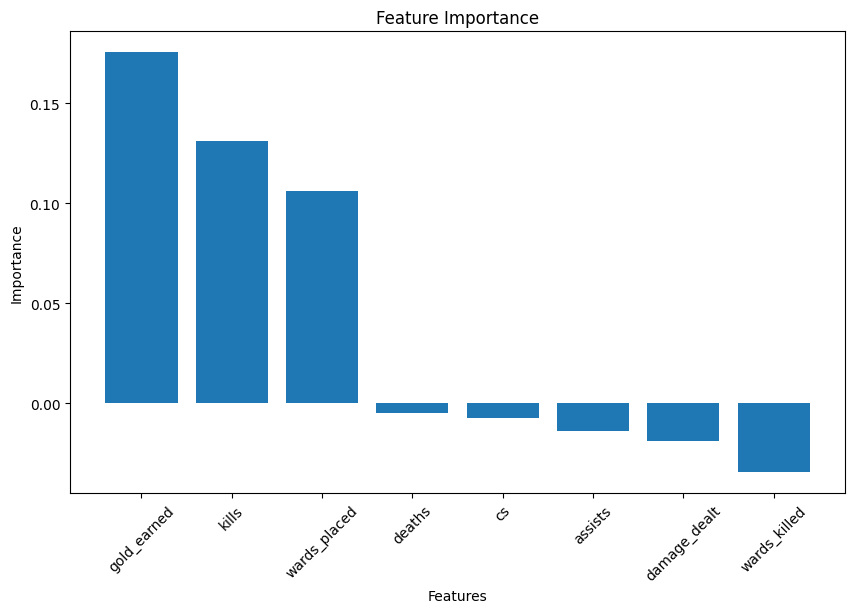

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 線形層の重みを抽出
weights = model.linear.weight.data.numpy().flatten()  # 線形層の重みをNumPy配列として取得
features = X.columns  # 特徴量の名前（データセットの列名）を取得

# 特徴量の重要性をDataFrameにまとめる
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})  # 特徴量とその重要性のデータフレームを作成
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)  # 重要性で降順に並べ替え

# 特徴量の重要性を表示
print(feature_importance)

# 特徴量の重要性をプロット
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])  # バーグラフを作成
plt.xlabel('Features')  # x軸のラベル
plt.ylabel('Importance')  # y軸のラベル
plt.title('Feature Importance')  # グラフのタイトル
plt.xticks(rotation=45)  # x軸のラベルを45度回転
plt.show()


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.
